#### Download Data

In [303]:
import pandas as pd

In [304]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


#### Loading the data and other imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [7]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

#### Exploring Data

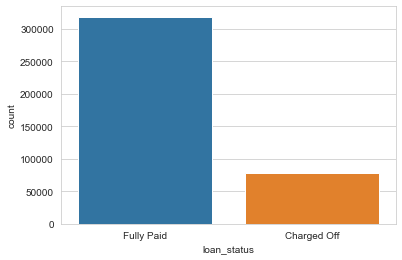

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='loan_status', data=df)

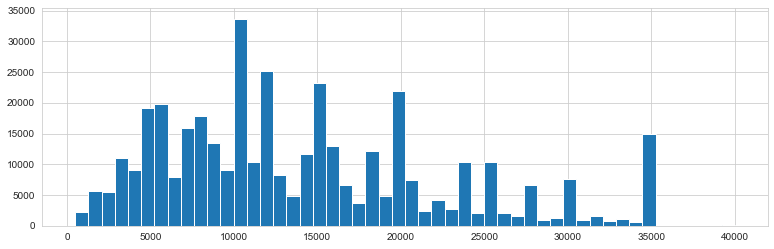

In [17]:
plt.figure(figsize=(13,4))
# sns.distplot(df['loan_amnt'],kde=False)
df['loan_amnt'].hist(bins=50)

In [18]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


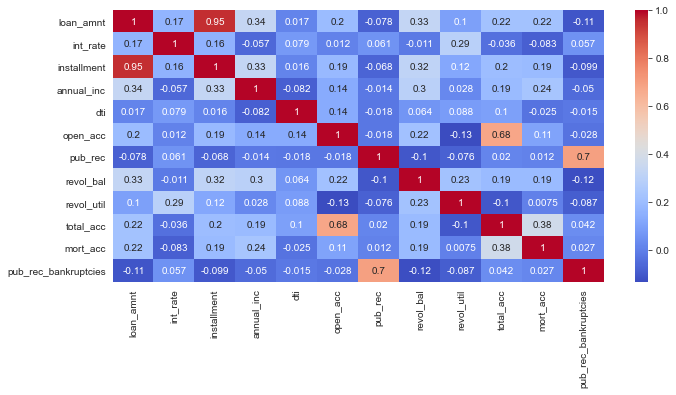

In [22]:
# Check corrlation
plt.figure(figsize=(11,5))
sns.heatmap(df.corr(), cmap="coolwarm",annot=True)

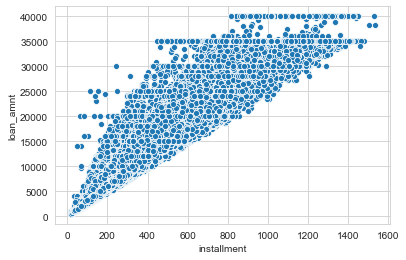

In [23]:
# Check potentional linear relationship
sns.scatterplot(x='installment',y='loan_amnt', data=df)

In [24]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [25]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


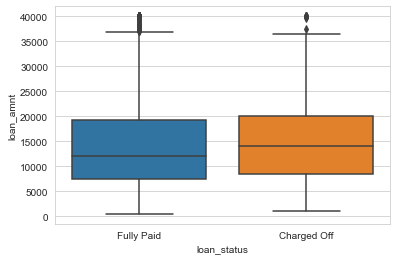

In [26]:
# Check Loan Status
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

In [31]:
# Check loan amount by loan status
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [55]:
# check grade level
print(sorted(df['grade'].unique()))
print(sorted(df['sub_grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']
['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


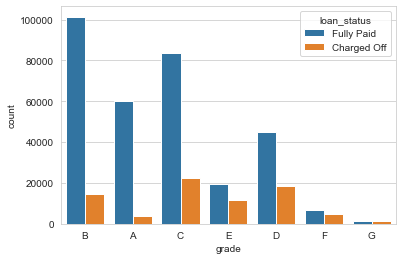

In [56]:
sns.countplot(x='grade', data=df, hue="loan_status")

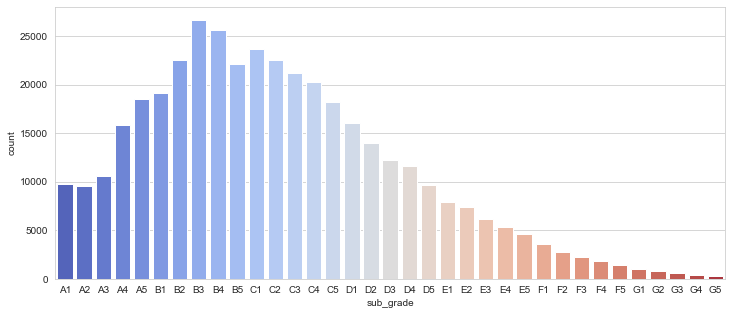

In [60]:
# check sub_grade
plt.figure(figsize=(12,5))
sns.countplot(x='sub_grade', data=df,
             order=sorted(df['sub_grade'].unique()),
             palette="coolwarm")

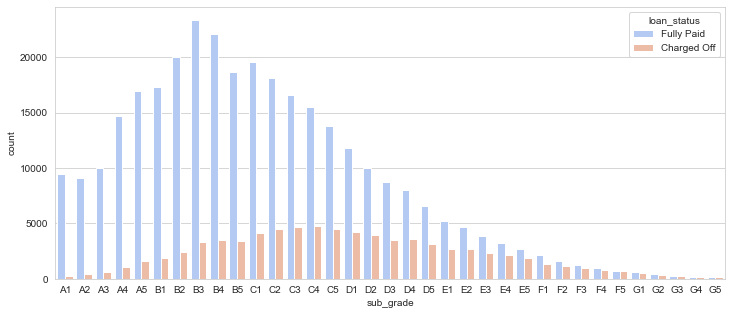

In [62]:
# hue by loan_status
plt.figure(figsize=(12,5))
sns.countplot(x='sub_grade', data=df,
              hue='loan_status',
             order=sorted(df['sub_grade'].unique()),
             palette="coolwarm")

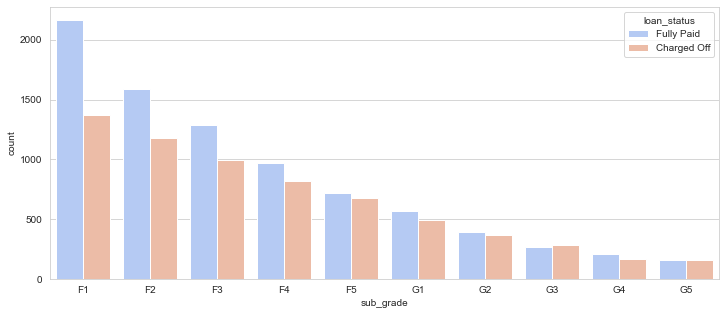

In [72]:
# Explore F, G group
plt.figure(figsize=(12,5))
sns.countplot(x='sub_grade', data=df[(df['grade'].isin(['F','G']))],
              hue='loan_status',
             order=sorted(df[(df['grade'].isin(['F','G']))]['sub_grade'].unique()),
             palette="coolwarm")

In [83]:
# loan_rapid One Hot
# def label_loan (x):
#     if x=="Fully Paid":
#         return 1
#     else:
#         return 0
    
# df['loan_repaid']= df.apply(lambda row: label_loan(row['loan_status']), axis=1)
# df['loan_repaid2']= df.apply(lambda x: 1 if x['loan_status']=="Fully Paid" else (0), axis=1)
# df.drop('loan_repaid2', axis=1, inplace=True)
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [84]:
df[['loan_repaid', 'loan_repaid', 'loan_status']]

,loan_repaid,loan_repaid,loan_status
0,1,1,Fully Paid
1,1,1,Fully Paid
2,1,1,Fully Paid
3,1,1,Fully Paid
4,0,0,Charged Off
...,...,...,...
396025,1,1,Fully Paid
396026,1,1,Fully Paid
396027,1,1,Fully Paid
396028,1,1,Fully Paid


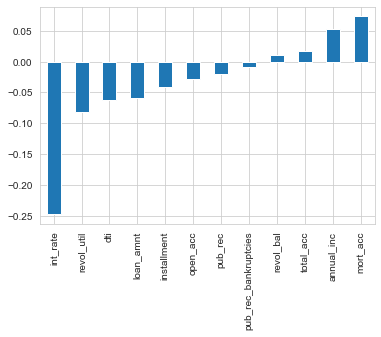

In [99]:
# Correlation
sns.set_style('whitegrid')
df.corr()['loan_repaid'][:-1].sort_values().plot(kind='bar')

#### Data check before modeling

In [104]:
df.count()

loan_amnt               396030
term                    396030
int_rate                396030
installment             396030
grade                   396030
sub_grade               396030
emp_title               373103
emp_length              377729
home_ownership          396030
annual_inc              396030
verification_status     396030
issue_d                 396030
loan_status             396030
purpose                 396030
title                   394275
dti                     396030
earliest_cr_line        396030
open_acc                396030
pub_rec                 396030
revol_bal               396030
revol_util              395754
total_acc               396030
initial_list_status     396030
application_type        396030
mort_acc                358235
pub_rec_bankruptcies    395495
address                 396030
loan_repaid             396030
dtype: int64

##### Dealing Missing Data

In [106]:
# CODE HERE
len(df)

396030

In [107]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [116]:
df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.057892
emp_length              0.046211
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.004431
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000697
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.095435
pub_rec_bankruptcies    0.001351
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [117]:
# column description
feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [121]:
# Employment title
df['emp_title'].nunique()

173105

In [125]:
df['emp_title'].value_counts()

Teacher                                 4389
Manager                                 4250
Registered Nurse                        1856
RN                                      1846
Supervisor                              1830
                                        ... 
Solara hospital                            1
Post-Secondary Readiness Coordinator       1
Dewberry                                   1
miami herald media company                 1
Rudy's Place                               1
Name: emp_title, Length: 173105, dtype: int64

In [126]:
# Drop employeement title - too many levels without many insights
df.drop('emp_title', axis=1, inplace=True)

In [149]:
sorted(df['emp_length'].dropna().unique())

pandas.core.frame.DataFrame

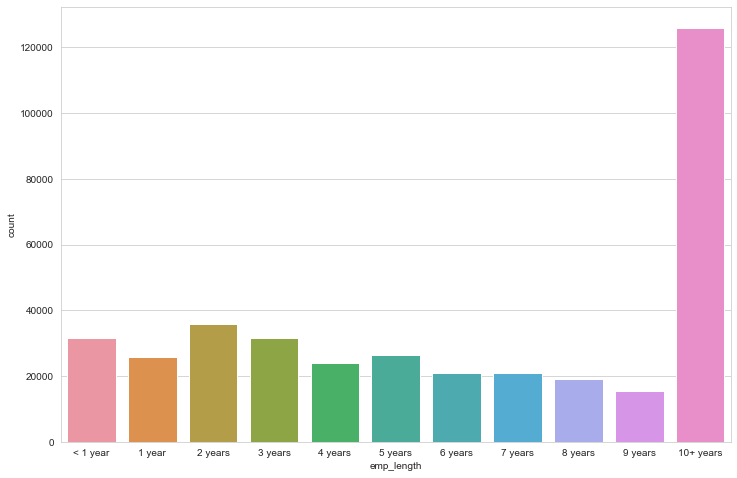

In [143]:
emp_length_order=[
                 '< 1 year',
                 '1 year',
                 '2 years',
                 '3 years',
                 '4 years',
                 '5 years',
                 '6 years',
                 '7 years',
                 '8 years',
                 '9 years',
                 '10+ years'
                 ]
plt.figure(figsize=(12,8))
sns.countplot(x='emp_length', data=pd.DataFrame(df['emp_length']), order=emp_length_order)

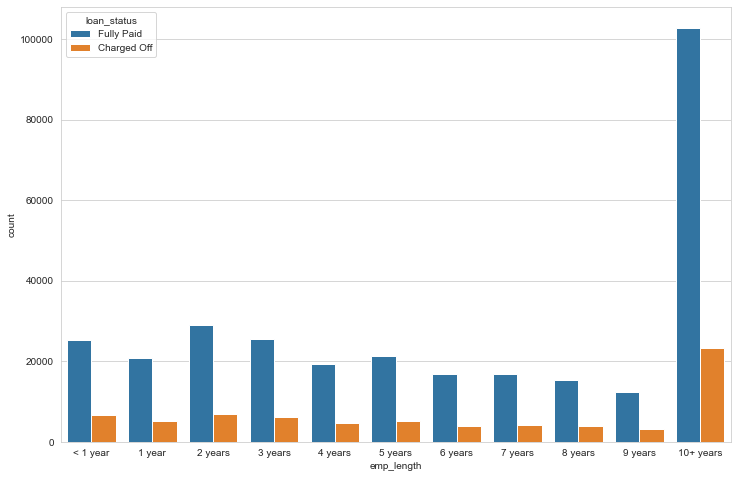

In [150]:
# Explore
emp_length_order=[
                 '< 1 year',
                 '1 year',
                 '2 years',
                 '3 years',
                 '4 years',
                 '5 years',
                 '6 years',
                 '7 years',
                 '8 years',
                 '9 years',
                 '10+ years'
                 ]
plt.figure(figsize=(12,8))
sns.countplot(x='emp_length', data=df, hue='loan_status', order=emp_length_order)

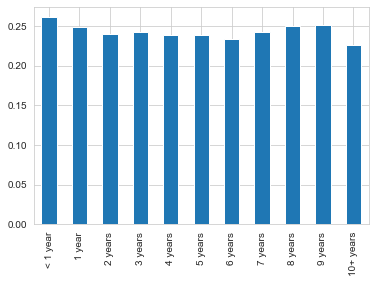

In [186]:
# Explore
emp_length_order=[
                 '< 1 year',
                 '1 year',
                 '2 years',
                 '3 years',
                 '4 years',
                 '5 years',
                 '6 years',
                 '7 years',
                 '8 years',
                 '9 years',
                 '10+ years'
                 ]

emp_len_pct = \
df[df['loan_status']=="Charged Off"]['emp_length'].value_counts().sort_index()/\
df[df['loan_status']=="Fully Paid"]['emp_length'].value_counts().sort_index()

emp_len_pct.loc[emp_length_order].plot(kind='bar')

In [192]:
# Drop employement length
# df.drop('emp_length', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   home_ownership        396030 non-null  object 
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  object 
 9   issue_d               396030 non-null  object 
 10  loan_status           396030 non-null  object 
 11  purpose               396030 non-null  object 
 12  title                 394275 non-null  object 
 13  dti                   396030 non-null  float64
 14  earliest_cr_line      396030 non-null  object 
 15  

In [195]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [196]:
# Check purpose
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [72]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [197]:
# Drop title - repeated info
df.drop('title', axis=1, inplace=True)

In [198]:
# Explore mort_acc
feat_info('mort_acc')

Number of mortgage accounts.


In [199]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [201]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [215]:
df.groupby('total_acc')['mort_acc'].mean()

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [218]:
# Check accuracy by total_acc
mort_acc_avg_by_total_acc =\
df.groupby('total_acc')['mort_acc'].mean()

def fill_mort_na(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return mort_acc_avg_by_total_acc[total_acc]
    else:
        return(mort_acc)
    
df['mort_acc'] = df.apply(lambda x: fill_mort_na(x['total_acc'], x['mort_acc']), axis=1)

In [219]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [225]:
df.iloc[:,0].count()

396030

In [229]:
df = df.dropna()
df.isnull().sum()

0          36 months
1          36 months
2          36 months
3          36 months
4          60 months
             ...    
396025     60 months
396026     36 months
396027     36 months
396028     60 months
396029     36 months
Name: term, Length: 395219, dtype: object

#### One Hot Dummies

In [237]:
df.select_dtypes(include=['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [288]:
# df.head()
# df['term2'] = df['term'].apply(lambda x: 36 if x.strip()=='36 months' else (60))
df['term'] = df['term'].apply(lambda x: int(x[:3]))

In [295]:
# Drop grade
df.columns
df.drop('grade', axis=1, inplace=True)

In [296]:
# One hot sub_grade
subgrade_dummy = pd.get_dummies(df['sub_grade'], drop_first=True)


,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [297]:
df = pd.concat([df.drop('sub_grade', axis=1), subgrade_dummy], axis=1)

In [301]:
df.select_dtypes('object').columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [312]:
# One hot
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df.drop(['verification_status', 'application_type','initial_list_status','purpose' ], axis=1, inplace=True)
df = pd.concat([df,dummies], axis=1)

In [317]:
df.columns
df.select_dtypes('object').columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

In [335]:
# Ownership
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [338]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'],'OTHER')
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [344]:
df.select_dtypes('object').columns
df['home_ownership'].value_counts()

Index(['issue_d', 'loan_status', 'earliest_cr_line', 'address',
       'home_ownership'],
      dtype='object')

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [345]:
ownership_dummy = pd.get_dummies(df['home_ownership'], drop_first=True)
df.drop('home_ownership', axis=1, inplace=True)
df = pd.concat([df, ownership_dummy], axis=1)

In [358]:
# Check address
df['address'].head()
df['zip_code'] = df['address'].apply(lambda x: x[-5:])
df[['address', 'zip_code']].head()

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

,address,zip_code
0,"0174 Michelle Gateway\nMendozaberg, OK 22690",22690
1,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",05113
2,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",05113
3,"823 Reid Ford\nDelacruzside, MA 00813",00813
4,"679 Luna Roads\nGreggshire, VA 11650",11650


In [359]:
# One hot zip
zip_dummy = pd.get_dummies(df['zip_code'], drop_first=True)
df.drop(['zip_code', 'address'], axis=1, inplace=True)
df = pd.concat([df,zip_dummy], axis=1)

In [361]:
df.columns
df.select_dtypes('object').columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT'

Index(['issue_d', 'loan_status', 'earliest_cr_line'], dtype='object')

In [111]:
# drop issue_d
df.drop('issue_d', axis=1, inplace=True)

In [366]:
# Subset year
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: int(x[-4:]))
df = df.drop('earliest_cr_line',axis=1)

str

int

In [372]:
df.select_dtypes('object').columns

Index(['loan_status'], dtype='object')

0     Fully Paid
1     Fully Paid
2     Fully Paid
3     Fully Paid
4    Charged Off
Name: loan_status, dtype: object

#### Model Train Test Split

In [380]:
from sklearn.model_selection import train_test_split

In [374]:
df.drop('loan_status', axis=1, inplace=True)

In [376]:
# Set X,Y
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values

In [379]:
# df = df.sample(frac=0.1,random_state=101)
print(len(df))
df_sub = df.sample(frac=0.1, random_state=101)
print(len(df_sub))

395219
39522


In [381]:
X = df_sub.drop('loan_repaid', axis=1).values
y = df_sub['loan_repaid'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [397]:
df_sub.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
204901,14800.0,36,18.49,538.71,104540.0,13.12,10.0,0.0,21241.0,60.9,...,1,0,0,0,0,0,0,0,0,1992
226870,31000.0,60,17.57,779.97,122000.0,27.46,20.0,0.0,36941.0,55.1,...,0,0,0,1,0,0,0,0,0,1996
241733,22000.0,60,7.89,444.93,71400.0,21.29,9.0,0.0,5212.0,41.7,...,0,0,0,0,0,0,0,0,0,2003
225481,20000.0,36,10.78,652.70,100000.0,17.86,14.0,0.0,11139.0,38.9,...,0,0,1,0,0,0,0,0,0,1994
104657,18625.0,60,17.57,468.61,41500.0,18.80,20.0,0.0,27975.0,38.9,...,0,0,0,1,0,0,0,0,0,1993


#### Normalizing

In [382]:
from sklearn.preprocessing import MinMaxScaler

In [386]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [396]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39522 entries, 204901 to 160674
Data columns (total 79 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            39522 non-null  float64
 1   term                                 39522 non-null  int64  
 2   int_rate                             39522 non-null  float64
 3   installment                          39522 non-null  float64
 4   annual_inc                           39522 non-null  float64
 5   dti                                  39522 non-null  float64
 6   open_acc                             39522 non-null  float64
 7   pub_rec                              39522 non-null  float64
 8   revol_bal                            39522 non-null  float64
 9   revol_util                           39522 non-null  float64
 10  total_acc                            39522 non-null  float64
 11  mort_acc              

#### Modelling

In [387]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [401]:
model = Sequential()
# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))
# hidden layer 1
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))
# hidden layer 2
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))
# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile
model.compile(loss='binary_crossentropy', optimizer='adam')

# Choose whatever number of layers/neurons you want.

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

# Remember to compile()

In [421]:
len(X_train[0] )
y_train
X_train.shape

78

array([0, 0, 1, ..., 1, 1, 1])

(31617, 78)

In [402]:
# Fit
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
124/124 [==============================] - 1s 5ms/step - loss: 0.4966 - val_loss: 0.3672
Epoch 2/25
124/124 [==============================] - 0s 3ms/step - loss: 0.3404 - val_loss: 0.2888
Epoch 3/25
124/124 [==============================] - 0s 3ms/step - loss: 0.2917 - val_loss: 0.2773
Epoch 4/25
124/124 [==============================] - 0s 2ms/step - loss: 0.2813 - val_loss: 0.2740
Epoch 5/25
124/124 [==============================] - 0s 2ms/step - loss: 0.2772 - val_loss: 0.2733
Epoch 6/25
124/124 [==============================] - 0s 3ms/step - loss: 0.2744 - val_loss: 0.2720
Epoch 7/25
124/124 [==============================] - 0s 3ms/step - loss: 0.2699 - val_loss: 0.2719
Epoch 8/25
124/124 [==============================] - 0s 3ms/step - loss: 0.2685 - val_loss: 0.2717
Epoch 9/25
124/124 [==============================] - 0s 2ms/step - loss: 0.2675 - val_loss: 0.2707
Epoch 10/25
124/124 [==============================] - 0s 2ms/step - loss: 0.2658 - val_loss: 0.2718

In [403]:
# Save model
from tensorflow.keras.models import load_model

model.save('sample_data.project_model.h5')

#### Evaluating

In [405]:
loss = pd.DataFrame(model.history.history)

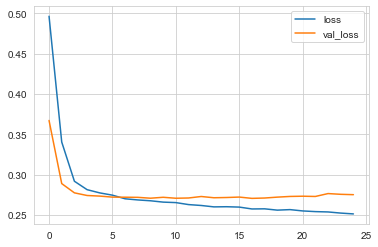

In [407]:
loss.plot()

In [411]:
from sklearn.metrics import classification_report, confusion_matrix

pred = model.predict_classes(X_test)
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.46      0.61      1570
           1       0.88      0.99      0.93      6335

    accuracy                           0.88      7905
   macro avg       0.89      0.72      0.77      7905
weighted avg       0.88      0.88      0.87      7905



[[ 718  852]
 [  83 6252]]


In [414]:
# Evaluate at individual obs
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [423]:
new_customer_fit = scaler.transform(new_customer.values.reshape(1,78))
model.predict_classes(new_customer_fit)

array([[1]], dtype=int32)

In [420]:
df['loan_repaid'].iloc[random_ind]

1